In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras import models, layers, optimizers

Using TensorFlow backend.


In [3]:
# dataset - abalone
abalone_df = pd.read_csv('abalone_scikit_onehot_dataset.csv')
abalone_df.head(3)
len(abalone_df.columns)

,sex_1,sex_2,sex_3,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15.0
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7.0
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9.0


11

C:\Users\1_pha\AppData\Local\Continuum\anaconda3\envs\pathenv\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\1_pha\AppData\Local\Continuum\anaconda3\envs\pathenv\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\1_pha\AppData\Local\Continuum\anaconda3\envs\pathenv\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\1_pha\AppData\Local\Continuum\anaconda3\envs\pathenv\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


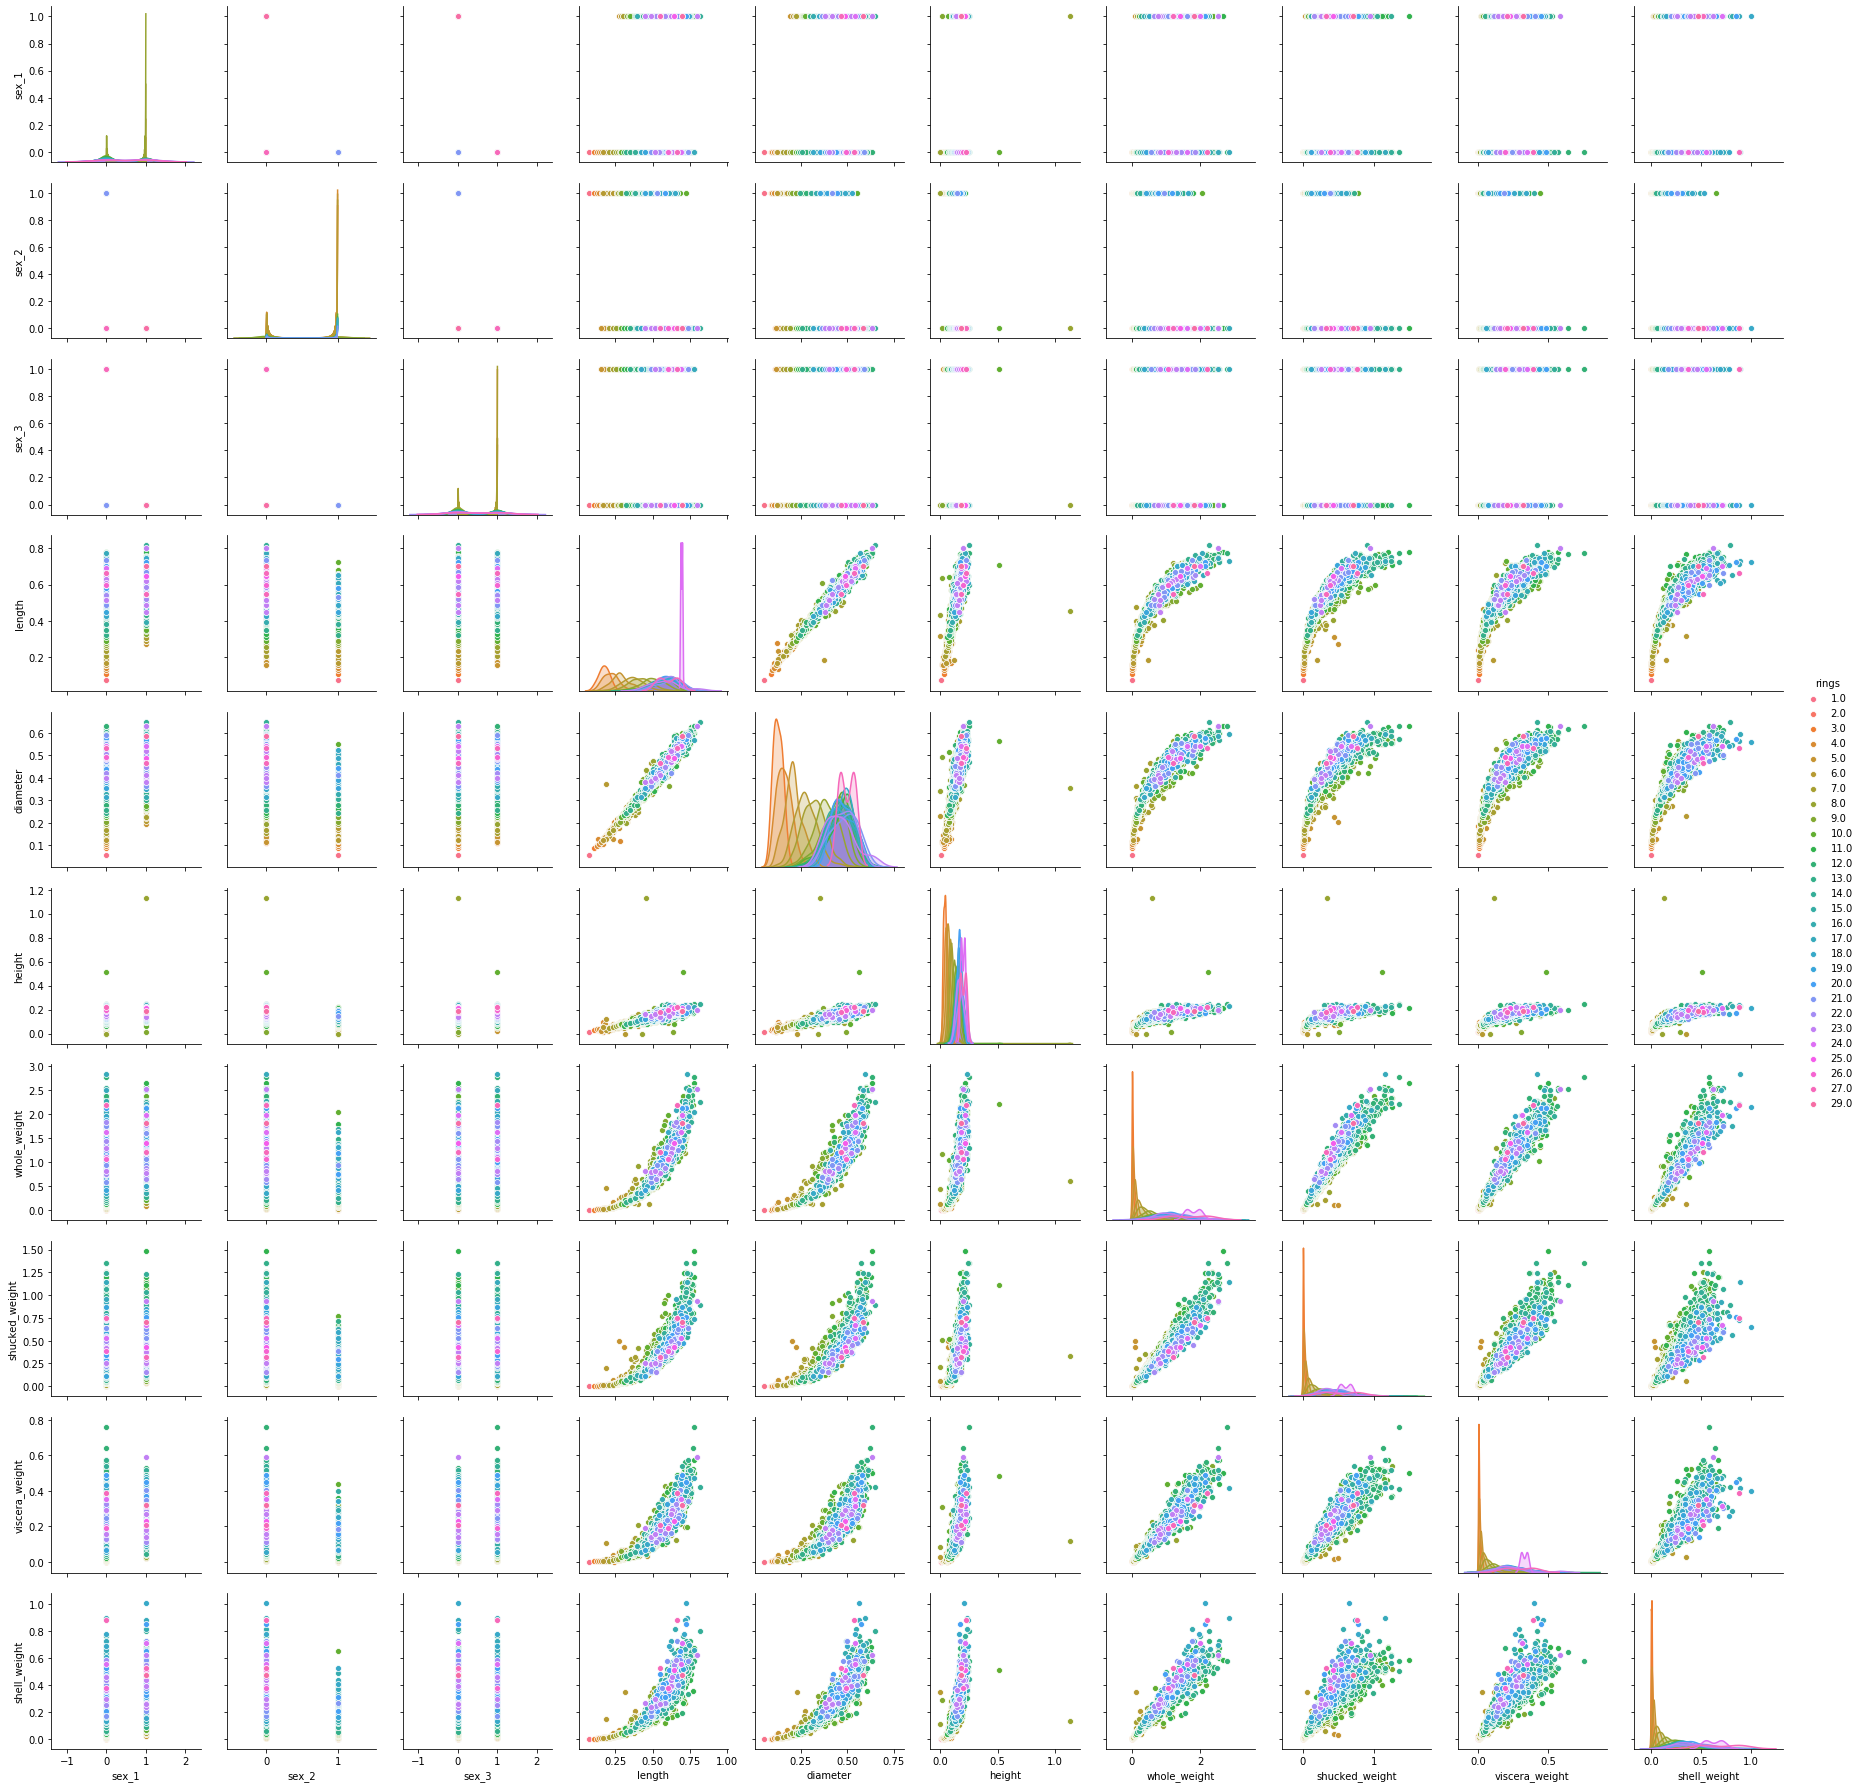

In [4]:
sns.pairplot(data=abalone_df, vars=list(abalone_df.columns[:-1]), kind='scatter', hue='rings')

In [42]:
x_train = np.array(abalone_df.iloc[:3600, :-1])
x_test = np.array(abalone_df.iloc[3600:, :-1])
target = np.array(abalone_df.iloc[:, -1])

target_encoded = []
for data in target:
    target_encoded.append([0 if i!=data else 1 for i in range(29)])
oe_train = np.array(target_encoded[:3600])
oe_test = np.array(target_encoded[3600:])

y_train = np.array(abalone_df.iloc[:3600, -1])
y_test = np.array(abalone_df.iloc[3600:, -1])

In [63]:
model = models.Sequential()
model.add(layers.Dense(200, activation='relu', input_shape=(10,)))
#model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(29, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=500, batch_size=256, validation_data=(x_test, y_test))

Train on 3600 samples, validate on 577 samples
Epoch 1/500
3600/3600 [==============================] - 1s 146us/step - loss: 0.1780 - acc: 0.0178 - val_loss: 0.1143 - val_acc: 0.0485
Epoch 2/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0874 - acc: 0.0578 - val_loss: 0.0586 - val_acc: 0.1196
Epoch 3/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0505 - acc: 0.1253 - val_loss: 0.0402 - val_acc: 0.2305
Epoch 4/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0381 - acc: 0.1917 - val_loss: 0.0342 - val_acc: 0.2288
Epoch 5/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0338 - acc: 0.1925 - val_loss: 0.0319 - val_acc: 0.2340
Epoch 6/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0320 - acc: 0.1936 - val_loss: 0.0308 - val_acc: 0.1802
Epoch 7/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0312 - acc: 0.1861 - val_loss: 0.0301 - val_acc: 0.2322
Epoch 

Epoch 61/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0290 - acc: 0.2422 - val_loss: 0.0280 - val_acc: 0.2912
Epoch 62/500
3600/3600 [==============================] - 0s 4us/step - loss: 0.0289 - acc: 0.2528 - val_loss: 0.0279 - val_acc: 0.2912
Epoch 63/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0289 - acc: 0.2583 - val_loss: 0.0280 - val_acc: 0.2808
Epoch 64/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0289 - acc: 0.2547 - val_loss: 0.0277 - val_acc: 0.2912
Epoch 65/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0289 - acc: 0.2533 - val_loss: 0.0278 - val_acc: 0.2946
Epoch 66/500
3600/3600 [==============================] - 0s 7us/step - loss: 0.0289 - acc: 0.2514 - val_loss: 0.0279 - val_acc: 0.2721
Epoch 67/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0289 - acc: 0.2508 - val_loss: 0.0279 - val_acc: 0.2669
Epoch 68/500
3600/3600 [========================

3600/3600 [==============================] - 0s 6us/step - loss: 0.0284 - acc: 0.2667 - val_loss: 0.0275 - val_acc: 0.2860
Epoch 122/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0284 - acc: 0.2683 - val_loss: 0.0275 - val_acc: 0.2912
Epoch 123/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0284 - acc: 0.2619 - val_loss: 0.0276 - val_acc: 0.2860
Epoch 124/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0284 - acc: 0.2592 - val_loss: 0.0273 - val_acc: 0.2912
Epoch 125/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0284 - acc: 0.2631 - val_loss: 0.0274 - val_acc: 0.2929
Epoch 126/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0284 - acc: 0.2606 - val_loss: 0.0274 - val_acc: 0.2825
Epoch 127/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0284 - acc: 0.2608 - val_loss: 0.0275 - val_acc: 0.2808
Epoch 128/500
3600/3600 [==============================

Epoch 181/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0282 - acc: 0.2647 - val_loss: 0.0272 - val_acc: 0.2946
Epoch 182/500
3600/3600 [==============================] - 0s 4us/step - loss: 0.0282 - acc: 0.2708 - val_loss: 0.0275 - val_acc: 0.3224
Epoch 183/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0282 - acc: 0.2706 - val_loss: 0.0272 - val_acc: 0.3085
Epoch 184/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0282 - acc: 0.2681 - val_loss: 0.0273 - val_acc: 0.3137
Epoch 185/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0282 - acc: 0.2722 - val_loss: 0.0272 - val_acc: 0.2981
Epoch 186/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0282 - acc: 0.2767 - val_loss: 0.0272 - val_acc: 0.3154
Epoch 187/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0282 - acc: 0.2636 - val_loss: 0.0272 - val_acc: 0.3033
Epoch 188/500
3600/3600 [================

Epoch 241/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0280 - acc: 0.2794 - val_loss: 0.0271 - val_acc: 0.3068
Epoch 242/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0280 - acc: 0.2742 - val_loss: 0.0271 - val_acc: 0.3258
Epoch 243/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0280 - acc: 0.2758 - val_loss: 0.0271 - val_acc: 0.3154
Epoch 244/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0280 - acc: 0.2708 - val_loss: 0.0273 - val_acc: 0.3016
Epoch 245/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0280 - acc: 0.2742 - val_loss: 0.0272 - val_acc: 0.3172
Epoch 246/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0280 - acc: 0.2803 - val_loss: 0.0271 - val_acc: 0.3085
Epoch 247/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0280 - acc: 0.2717 - val_loss: 0.0273 - val_acc: 0.3172
Epoch 248/500
3600/3600 [================

Epoch 301/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0279 - acc: 0.2758 - val_loss: 0.0271 - val_acc: 0.3276
Epoch 302/500
3600/3600 [==============================] - 0s 7us/step - loss: 0.0279 - acc: 0.2819 - val_loss: 0.0272 - val_acc: 0.3172
Epoch 303/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0279 - acc: 0.2758 - val_loss: 0.0271 - val_acc: 0.3154
Epoch 304/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0279 - acc: 0.2764 - val_loss: 0.0272 - val_acc: 0.3224
Epoch 305/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0279 - acc: 0.2828 - val_loss: 0.0271 - val_acc: 0.3068
Epoch 306/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0279 - acc: 0.2714 - val_loss: 0.0270 - val_acc: 0.3258
Epoch 307/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0279 - acc: 0.2847 - val_loss: 0.0271 - val_acc: 0.3085
Epoch 308/500
3600/3600 [================

Epoch 361/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0278 - acc: 0.2822 - val_loss: 0.0270 - val_acc: 0.3154
Epoch 362/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0278 - acc: 0.2833 - val_loss: 0.0270 - val_acc: 0.3068
Epoch 363/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0278 - acc: 0.2878 - val_loss: 0.0271 - val_acc: 0.3137
Epoch 364/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0278 - acc: 0.2814 - val_loss: 0.0272 - val_acc: 0.3085
Epoch 365/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0278 - acc: 0.2825 - val_loss: 0.0272 - val_acc: 0.3102
Epoch 366/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0278 - acc: 0.2783 - val_loss: 0.0271 - val_acc: 0.3068
Epoch 367/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0278 - acc: 0.2794 - val_loss: 0.0271 - val_acc: 0.3137
Epoch 368/500
3600/3600 [================

Epoch 421/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0277 - acc: 0.2856 - val_loss: 0.0270 - val_acc: 0.3241
Epoch 422/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0277 - acc: 0.2878 - val_loss: 0.0268 - val_acc: 0.3102
Epoch 423/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0277 - acc: 0.2936 - val_loss: 0.0271 - val_acc: 0.3137
Epoch 424/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0277 - acc: 0.2911 - val_loss: 0.0270 - val_acc: 0.3276
Epoch 425/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0277 - acc: 0.2842 - val_loss: 0.0269 - val_acc: 0.3172
Epoch 426/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0277 - acc: 0.2828 - val_loss: 0.0268 - val_acc: 0.3137
Epoch 427/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0277 - acc: 0.2833 - val_loss: 0.0269 - val_acc: 0.3258
Epoch 428/500
3600/3600 [================

Epoch 481/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0277 - acc: 0.2894 - val_loss: 0.0270 - val_acc: 0.3102
Epoch 482/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0277 - acc: 0.2842 - val_loss: 0.0269 - val_acc: 0.3189
Epoch 483/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0277 - acc: 0.2908 - val_loss: 0.0268 - val_acc: 0.3206
Epoch 484/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0277 - acc: 0.2908 - val_loss: 0.0269 - val_acc: 0.3120
Epoch 485/500
3600/3600 [==============================] - 0s 5us/step - loss: 0.0277 - acc: 0.2889 - val_loss: 0.0269 - val_acc: 0.3102
Epoch 486/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0277 - acc: 0.2956 - val_loss: 0.0269 - val_acc: 0.3154
Epoch 487/500
3600/3600 [==============================] - 0s 6us/step - loss: 0.0277 - acc: 0.2925 - val_loss: 0.0270 - val_acc: 0.3172
Epoch 488/500
3600/3600 [================

Text(0.5, 1.0, 'Training and Validation loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

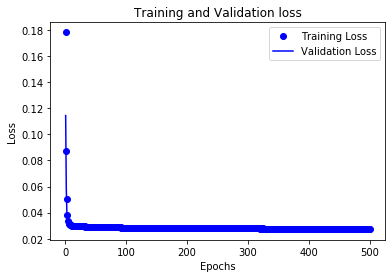

In [64]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Training and Validation Accuracy')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

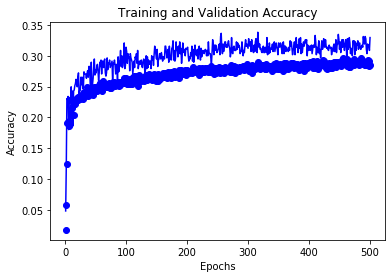

In [65]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [66]:
results = model.evaluate(x_test, y_test)
results

577/577 [==============================] - 0s 14us/step


[0.02689590880669899, 0.3292894280762565]